# MNIST Digit Addition
## Plotting of experiment's results

In [17]:
import time
import sys
import re
import os
sys.path.append('../')
sys.path.append('../SLASH/')
sys.path.append('../EinsumNetworks/src/')


#torch, numpy, ...
import torch
from torch.utils.tensorboard import SummaryWriter

import numpy as np
import importlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

plt.style.use(["science", "grid"])  # Need SciencePlots pip package


matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": False,
        "font.size": 16
    }
)


import utils


from slash import SLASH
from tqdm.notebook import tqdm

# Hadling missing data
## Training with the drop-out rate of 50/80/90/97 percent.
### 1) SLASH
### 2) DeepProbLog

SLASH accuracy overview: [75.05, 88.03999999999999, 79.86999999999999, 86.26, 83.6]
SLASH: 82.564+/-4.656997315867812
DeepProbLog accuracy overview: [array(9.8), array(11.35), array(59.06), array(59.91), array(22.16)]
DeepProbLog: 32.456+/-22.477811815210128


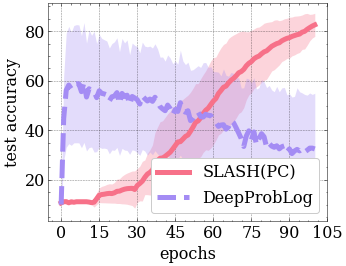

In [18]:
# Firstly load the data from the trained models for both DPPLs
# and trasform the measurements of time and test accuracy to be ready to plot 
drop_out = '97'  # 50, 80, 90, 97
## 1) SLASH, below referred to uncapitalised as 'slash'
slash_accuracy_lists = []
slash_accuracy_overview = []
slash_time_list = []
slash_results_path = os.path.join(os.getcwd(), 'data')
folders = [x for x in os.listdir(slash_results_path) if re.search(f'pc-poon-domingos-drop-out-{drop_out}-percent-seed-*', x)]
# print(len(folders))
for f in folders:
    model_path = os.path.join(slash_results_path, f, 'slash_digit_addition_models.pt')
    models = torch.load(model_path)
    if drop_out == '97':
        slash_accuracy_lists.append(np.concatenate((np.array([10.67]), np.array(models['test_accuracy_list'])[:,0]*100), axis=0))
    else:
        slash_accuracy_lists.append(np.array(models['test_accuracy_list'])[:,0]*100)
    slash_accuracy_overview.append(np.array(models['test_accuracy_list'])[-1,0]*100)
    time = models['time'][0].split(':')
    time = int(time[1].split('m')[0]) * 60 + int(time[2].split('s')[0])
    slash_time_list.append(time)
slash_average_epoch_time = np.average(slash_time_list)
minutes = round(slash_average_epoch_time // 60 % 60)
seconds = round(slash_average_epoch_time % 60)
slash_average_epoch_time = f"{minutes}m:{seconds}s"
# Determine and print the accuracy's overview
print(f'SLASH accuracy overview: {slash_accuracy_overview}')
slash_overview_average = np.average(slash_accuracy_overview, axis=0)
slash_overview_std = np.std(slash_accuracy_overview, axis=0)
print(f'SLASH: {slash_overview_average}+/-{slash_overview_std}')
slash_accuracy_average = np.average(slash_accuracy_lists, axis=0)
slash_accuracy_std = np.std(slash_accuracy_lists, axis=0)
    
## 2) DeepProbLog (DPL). below marked as dpl
dpl_accuracy_lists = []
dpl_accuracy_overview = []
dpl_time_list = []
dpl_results_path = os.path.join(os.getcwd(), 'data', 'deepproblog')
files = [x for x in os.listdir(dpl_results_path) if re.search(f'MNIST_Addition_100_epochs_do_{drop_out}_percent_seed_*', x)]
for f in files:
    accuracy = []
    time = []
    c = open(os.path.join(dpl_results_path,f), 'r')
    lines = c.readlines()[1:]
    spl = lines[0].split(',')
    time.append(float(0.0))
    accuracy.append(float(spl[1]))
    for line in lines[1:]:
        spl = line.split(',')
        time.append(float(spl[2]))
        accuracy.append(float(spl[1]))
    dpl_accuracy_lists.append(np.array(accuracy))
    dpl_accuracy_overview.append(np.array(accuracy[-1]))
    dpl_time_list.append(time[-1]/100)
dpl_average_epoch_time = np.average(dpl_time_list)
minutes = round(dpl_average_epoch_time // 60 % 60)
seconds = round(dpl_average_epoch_time % 60)
dpl_average_epoch_time = f"{minutes}m:{seconds}s"
# Determine and print the accuracy's overview
print(f'DeepProbLog accuracy overview: {dpl_accuracy_overview}')
dpl_overview_average = np.average(dpl_accuracy_overview, axis=0)
dpl_overview_std = np.std(dpl_accuracy_overview, axis=0)
print(f'DeepProbLog: {dpl_overview_average}+/-{dpl_overview_std}')
dpl_accuracy_average = np.average(dpl_accuracy_lists, axis=0)
dpl_accuracy_std = np.std(dpl_accuracy_lists, axis=0)

# Accuracy plots
clrs = sns.color_palette("husl", 4)
x = np.arange(0,101)

fig1, axs1 = plt.subplots(figsize=(5,4))
axs1.plot(x, slash_accuracy_average, label='SLASH(PC)',
          c=clrs[0], linewidth=5)
axs1.fill_between(x, 
                  slash_accuracy_average - slash_accuracy_std, 
                  slash_accuracy_average + slash_accuracy_std,
                  alpha=0.3, edgecolor=clrs[0], facecolor=clrs[0],
                  linewidth=0)
                 
axs1.plot(x, dpl_accuracy_average, label='DeepProbLog',
          c=clrs[3], linewidth=5, linestyle='--')
axs1.fill_between(x, 
                  dpl_accuracy_average - dpl_accuracy_std, 
                  dpl_accuracy_average + dpl_accuracy_std,
                  alpha=0.3, edgecolor=clrs[3], facecolor=clrs[3],
                  linewidth=0)


#legends and axis titles
axs1.legend(loc="lower right")
axs1.set(xlabel='epochs', ylabel='test accuracy')
axs1.xaxis.set_major_locator(MaxNLocator(integer=True))

utils.mkdir_p('plots')
fig1.savefig(f'plots/MNIST_addition_with_drop_out_of_{drop_out}_percent.svg', format="svg")
plt.show()

# DPPLs in MNIST-Addition task
### 1) SLASH (PC)
### 2) SLASH (DNN)
### 3) NeurASP
### 4) DeepProbLog

RTE (m:s) - SLASH (PC) 1m:22s
Test accuracy - SLASH (PC) 95.386+/-0.29206848511949807
RTE (m:s) - SLASH (DNN) 0m:39s
Test accuracy - SLASH (DNN) 98.744+/-0.20626196934965796
RTE (m:s) - NeurASP  1m:24s
Test accuracy - NeurASP 98.21000000000001+/-0.2978590270581034
RTE (m:s) - DeepProbLog 10m:9s
Test accuracy - DeepProbLog 98.49000000000001+/-0.17765134392961643


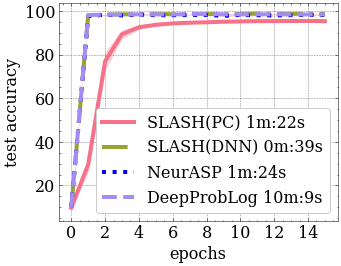

In [19]:
# Firstly load the data from the trained models for all DPPLs
# and trasform the measurements of time and test accuracy to be ready to plot 
## 1) SLASH (PC), below referred to uncapitalised as 'slash_pc'
slash_pc_accuracy_list = []
slash_pc_accuracy_overview = []
slash_pc_time_list = []
slash_results_path = os.path.join(os.getcwd(), 'data')
folder = [x for x in os.listdir(slash_results_path) if re.search('pc-poon-domingos-normal', x)]
for f in folder:
    model_path = os.path.join(slash_results_path, f, 'slash_digit_addition_models.pt')
    models = torch.load(model_path)
    slash_pc_accuracy_list.append(np.array(models['test_accuracy_list'])[:,0]*100)
    slash_pc_accuracy_overview.append(np.array(models['test_accuracy_list'])[-1,0]*100)
    time = models['time'][-1].split(':')
    time = int(time[1].split('m')[0]) * 60 + int(time[2].split('s')[0]) - (15*15)
    slash_pc_time_list.append(time / 15)
slash_pc_average_epoch_time = np.average(slash_pc_time_list)
slash_pc_minutes = round(slash_pc_average_epoch_time // 60 )
slash_pc_seconds = round(slash_pc_average_epoch_time % 60)
slash_pc_average_epoch_time = f"{slash_pc_minutes}m:{slash_pc_seconds}s"
print(f'RTE (m:s) - SLASH (PC) {slash_pc_average_epoch_time}')
# Determine and print the accuracy's overview
slash_pc_overview_average = np.average(slash_pc_accuracy_overview, axis=0)
slash_pc_overview_std = np.std(slash_pc_accuracy_overview, axis=0)
print(f'Test accuracy - SLASH (PC) {slash_pc_overview_average}+/-{slash_pc_overview_std}')
slash_pc_accuracy_average = np.average(slash_pc_accuracy_list, axis=0)
slash_pc_accuracy_std = np.std(slash_pc_accuracy_list, axis=0)

    

## 2) SLASH (DNN), below referred to uncapitalised as 'slash_dnn'
slash_dnn_accuracy_list = []
slash_dnn_accuracy_overview = []
slash_dnn_time_list = []
slash_dnn_results_path = os.path.join(os.getcwd(), 'data')
folder = [x for x in os.listdir(slash_dnn_results_path) if re.search('dnn-normal', x)]
for f in folder:
    model_path = os.path.join(slash_dnn_results_path, f, 'slash_digit_addition_models.pt')
    models = torch.load(model_path)
    slash_dnn_accuracy_list.append(np.array(models['test_accuracy_list'])[:,0]*100)
    slash_dnn_accuracy_overview.append(np.array(models['test_accuracy_list'])[-1,0]*100)
    time = models['time'][-1].split(':')
    time = int(time[1].split('m')[0]) * 60 + int(time[2].split('s')[0]) - (8*15)
    slash_dnn_time_list.append(time / 15)
slash_dnn_average_epoch_time = np.average(slash_dnn_time_list)
slash_dnn_minutes = round(slash_dnn_average_epoch_time // 60 )
slash_dnn_seconds = round(slash_dnn_average_epoch_time % 60)
slash_dnn_average_epoch_time = f"{slash_dnn_minutes}m:{slash_dnn_seconds}s"
print(f'RTE (m:s) - SLASH (DNN) {slash_dnn_average_epoch_time}')
# Determine and print the accuracy's overview
slash_dnn_overview_average = np.average(slash_dnn_accuracy_overview, axis=0)
slash_dnn_overview_std = np.std(slash_dnn_accuracy_overview, axis=0)
print(f'Test accuracy - SLASH (DNN) {slash_dnn_overview_average}+/-{slash_dnn_overview_std}')
slash_dnn_accuracy_average = np.average(slash_dnn_accuracy_list, axis=0)
slash_dnn_accuracy_std = np.std(slash_dnn_accuracy_list, axis=0)


## 3) NeurASP, below referred to uncapitalised as 'neurasp'
neurasp_accuracy_lists = []
neurasp_accuracy_overview = []
neurasp_time_lists = []
neurasp_results_path = os.path.join(os.getcwd(), 'data', 'neurasp')
files = [x for x in os.listdir(neurasp_results_path) if re.search('mnist_normal_seed', x)]
for f in files:
    model_path = os.path.join(neurasp_results_path, f)
    models = torch.load(model_path)
    neurasp_accuracy_lists.append(np.array(models['test_accuracy_list'])[:,0])
    neurasp_accuracy_overview.append(np.array(models['test_accuracy_list'])[-1,0])
    time = [x[0] for x in models['time']]
    seconds = 0
    for s in time:
        s = s.split('h:')[1]
        seconds += int(s.split('m:')[0]) * 60 + int(s.split('m:')[1].split('s')[0])
    time = seconds
    neurasp_time_lists.append(time / 15)
neurasp_average_epoch_time = np.average(neurasp_time_lists)
neurasp_minutes = round(neurasp_average_epoch_time // 60 )
neurasp_seconds = round(neurasp_average_epoch_time % 60)
neurasp_average_epoch_time = f"{neurasp_minutes}m:{neurasp_seconds}s"
print(f'RTE (m:s) - NeurASP  {neurasp_average_epoch_time}')
# Determine and print the accuracy's overview
neurasp_overview_average = np.average(neurasp_accuracy_overview, axis=0)
neurasp_overview_std = np.std(neurasp_accuracy_overview, axis=0)
print(f'Test accuracy - NeurASP {neurasp_overview_average}+/-{neurasp_overview_std}')
neurasp_accuracy_average = np.average(neurasp_accuracy_lists, axis=0)
neurasp_accuracy_std = np.std(neurasp_accuracy_lists, axis=0)

## 4) DeepProbLog (DPL). below marked as dpl
dpl_accuracy_lists = []
dpl_accuracy_overview = []
dpl_time_lists = []
dpl_results_path = os.path.join(os.getcwd(), 'data', 'deepproblog')
files = [x for x in os.listdir(dpl_results_path) if re.search('15_epochs_normal', x)]
for f in files:
    accuracy = []
    time = []
    c = open(os.path.join(dpl_results_path, f), 'r')
    lines = c.readlines()[1:]
    spl = lines[0].split(',')
    time.append(float(0.0))
    accuracy.append(float(spl[1]))
    for line in lines[1:]:
        spl = line.split(',')
        time.append(float(spl[2]))
        accuracy.append(float(spl[1]))
    dpl_accuracy_lists.append(np.array(accuracy))
    dpl_accuracy_overview.append(accuracy[-1])
    dpl_time_lists.append(time[-1]/15) 
dpl_average_epoch_time = np.average(dpl_time_lists)
minutes = round((dpl_average_epoch_time // 60) % 60)
seconds = round(dpl_average_epoch_time % 60)
dpl_average_epoch_time = f"{minutes}m:{seconds}s"
print(f'RTE (m:s) - DeepProbLog {dpl_average_epoch_time}')
# Determine and print the accuracy's overview
dpl_overview_average = np.average(dpl_accuracy_overview, axis=0)
dpl_overview_std = np.std(dpl_accuracy_overview, axis=0)
print(f'Test accuracy - DeepProbLog {dpl_overview_average}+/-{dpl_overview_std}')
dpl_accuracy_average = np.average(dpl_accuracy_lists, axis=0)
dpl_accuracy_std = np.std(dpl_accuracy_lists, axis=0)


# Accuracy plots
clrs = sns.color_palette("husl", 4)
x = np.arange(0,16)
fig1, axs1 = plt.subplots(figsize=(5,4))
axs1.plot(x, slash_pc_accuracy_average, label=f'SLASH(PC) {slash_pc_average_epoch_time}',
          c=clrs[0], linewidth=4)
axs1.fill_between(x, 
                  slash_pc_accuracy_average - slash_pc_accuracy_std, 
                  slash_pc_accuracy_average + slash_pc_accuracy_std,
                  alpha=0.3, edgecolor=clrs[0], facecolor=clrs[0],
                  linewidth=0)

axs1.plot(x, slash_dnn_accuracy_average, label=f'SLASH(DNN) {slash_dnn_average_epoch_time}',
          c=clrs[1], linewidth=4, linestyle='-.')
axs1.fill_between(x, 
                  slash_dnn_accuracy_average - slash_dnn_accuracy_std, 
                  slash_dnn_accuracy_average + slash_dnn_accuracy_std,
                  alpha=0.3, edgecolor=clrs[0], facecolor=clrs[0],
                  linewidth=0)


axs1.plot(x, neurasp_accuracy_average, label=f'NeurASP {neurasp_average_epoch_time}',
          c='blue', linewidth=4, linestyle=':')
axs1.fill_between(x, 
                  neurasp_accuracy_average - neurasp_accuracy_std, 
                  neurasp_accuracy_average + neurasp_accuracy_std,
                  alpha=0.3, edgecolor=clrs[0], facecolor=clrs[0],
                  linewidth=0)

axs1.plot(x, dpl_accuracy_average, label=f'DeepProbLog {dpl_average_epoch_time}',
          c=clrs[3], linewidth=4, linestyle='--')
axs1.fill_between(x, 
                  dpl_accuracy_average - dpl_accuracy_std, 
                  dpl_accuracy_average + dpl_accuracy_std,
                  alpha=0.3, edgecolor=clrs[0], facecolor=clrs[0],
                  linewidth=0)


#legends and axis titles
axs1.legend(loc="lower right")
axs1.set(xlabel='epochs', ylabel='test accuracy')
axs1.xaxis.set_major_locator(MaxNLocator(integer=True))

utils.mkdir_p('plots')
fig1.savefig('plots/MNIST_addition_complete_data.svg', format="svg")
plt.show()